# 反爬：瀏覽器標頭與基本資訊


* 了解「檢查 HTTP 標頭檔」的反爬蟲機制
* 「檢查 HTTP 標頭檔」反爬蟲的因應策略


## 作業目標

* 尋找一個網站是有作 Header 檢查的（Hint: 有加跟沒有加回傳結果不一樣）
* 用上述網站說明該如何判斷 Header 中必須加上哪些資料才會正確


### 尋找一個網站是有作 Header 檢查的（Hint: 有加跟沒有加回傳結果不一樣）

In [1]:
import requests
url = 'https://www.zhihu.com'

In [2]:
r = requests.get(url)
response = r.text

response

'<html>\r\n<head><title>400 Bad Request</title></head>\r\n<body bgcolor="white">\r\n<center><h1>400 Bad Request</h1></center>\r\n<hr><center>openresty</center>\r\n</body>\r\n</html>\r\n'

### 用上述網站說明該如何判斷 Header 中必須加上哪些資料才會正確


**Request Headers (14)**
```
:authority: www.zhihu.com
:method: GET
:path: /
:scheme: https
accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9
accept-encoding: gzip, deflate, br
accept-language: en-US,en;q=0.9,zh-TW;q=0.8,zh;q=0.7
cookie: _zap=e6eb59c3-d71b-4f0f-8428-ce37916ae5b0; _xsrf=5f8cc5c4-9245-4743-8ca4-40925b4fd324; d_c0="ALAX-9pYyhCPTiAUkng6vlyw4iyiL19LIDo=|1581237190"; capsion_ticket="2|1:0|10:1581262135|14:capsion_ticket|44:Y2E4MTVhOGQ2YjBkNGQ3MmJiZmEyNzMwMTY5N2JiYzg=|510e55eed1457ad7cb96c9b6634ed95e3ebf834e8f9cb90b09de4fbcc2c045b0"; KLBRSID=d6f775bb0765885473b0cba3a5fa9c12|1581262143|1581262112
dnt: 1
sec-fetch-mode: navigate
sec-fetch-site: none
sec-fetch-user: ?1
upgrade-insecure-requests: 1
user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36
```

In [3]:
headers = {
    'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130'
    }

'<!doctype html>\n<html lang="zh" data-hairline="true" data-theme="light"><head><meta charSet="utf-8"/><title data-react-helmet="true">知乎 - 有问题，上知乎</title><meta name="viewport" content="width=device-width,initial-scale=1,maximum-scale=1"/><meta name="renderer" content="webkit"/><meta name="force-rendering" content="webkit"/><meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"/><meta name="google-site-verification" content="FTeR0c8arOPKh8c5DYh_9uu98_zJbaWw53J-Sch9MTg"/><meta name="description" property="og:description" content="有问题，上知乎。知乎，可信赖的问答社区，以让每个人高效获得可信赖的解答为使命。知乎凭借认真、专业和友善的社区氛围，结构化、易获得的优质内容，基于问答的内容生产方式和独特的社区机制，吸引、聚集了各行各业中大量的亲历者、内行人、领域专家、领域爱好者，将高质量的内容透过人的节点来成规模地生产和分享。用户通过问答等交流方式建立信任和连接，打造和提升个人影响力，并发现、获得新机会。"/><link data-react-helmet="true" rel="apple-touch-icon" href="https://static.zhihu.com/heifetz/assets/apple-touch-icon-152.67c7b278.png"/><link data-react-helmet="true" rel="apple-touch-icon" href="https://static.zhihu.com/heifetz/assets/apple-touch-icon-152.67c7b278.pn
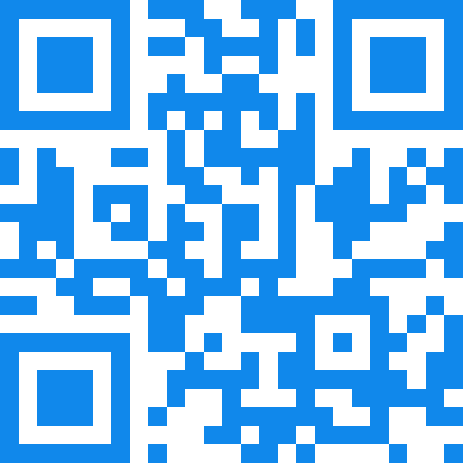

In [4]:
r = requests.get(url, headers=headers)
response = r.text

response

> ANS: header 至少要加上 `user-agent`